<a href="https://colab.research.google.com/github/VishanOberoi/FineTuningForTheGPUPoor/blob/main/Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Creation of Dataset**


For finetuning, you require a dataset on which the model needs to be trained. For our usecase, we created our own dataset using the following steps.

1. Extraction of data (From websites, blogs, etc.)
2. Formatting Data in Google docs
3. Creating Question and Answer Pairs using that data (using ChatGPT manually)
4. Checking all question and answer pairs (Google Docs)
5. Writing Python script to convert the question and answer pairs into a jsonl file, which will be used for further finetuning


This notebook covers the simple preparation of the data, after it has been generated by ChatGPT (based on company documents) so that it can be used for further finetuning

In [ ]:
import matplotlib.pyplot as plt
import json
import re
import pandas as pd

In [ ]:
#Converting the txt question file to jsonl format.

def parse_qa_pairs(text):
    # Regular expressions to identify questions and answers
    question_pattern = r"\*\*Question\*\*:\s*(.*?)\n"
    answer_pattern = r"\*\*Answer\*\*:\s*(.*?)\n"

    # Find all matches in the text
    questions = re.findall(question_pattern, text, re.DOTALL)
    answers = re.findall(answer_pattern, text, re.DOTALL)

    # Combine questions and answers into a list of dictionaries
    qa_pairs = [{"question": q, "answer": a} for q, a in zip(questions, answers)]

    return qa_pairs

# Read your text data from a file (replace 'your_file.txt' with your file path)
with open('/content/Training.txt', 'r') as file:
    text = file.read()

# Parse the question-answer pairs
qa_pairs = parse_qa_pairs(text)

# Convert to JSONL and write to a file
with open('output.jsonl', 'w') as file:
    for pair in qa_pairs:
        json_line = json.dumps(pair)
        file.write(json_line + "\n")

In [ ]:
data = pd.read_json("/content/output.jsonl", lines = True)
data #1000 questions is a good amount

,question,answer
0,What does ESG stand for in the context of Mait...,"ESG stands for Environmental, Social, and Gove..."
1,What is Maitri Lab Grown Diamond's goal in ter...,Maitri Lab Grown Diamond aims to become a net-...
2,How does Maitri Lab Grown Diamond emphasize su...,Sustainability is at the core of Maitri Lab Gr...
3,What are the key priorities under Maitri Lab G...,The key priorities include environmental respo...
4,How does Maitri Lab Grown Diamond reduce its c...,Maitri Lab Grown Diamond reduces its carbon fo...
...,...,...
1015,What steps has Maitri Labgrown Diamonds taken ...,Maitri Labgrown Diamonds ensures ethical sourc...
1016,How does Maitri Labgrown Diamonds contribute t...,Maitri Labgrown Diamonds mitigates the environ...
1017,What role does the SCS-007 sustainability cert...,The SCS-007 sustainability certificate helps M...
1018,How does Maitri Labgrown Diamonds' commitment ...,Maitri Labgrown Diamonds' CSR commitment align...


In [ ]:
Q_len_list = []
for item in data['question']:
  Q_len_list.append(len(item.strip()))

A_len_list = []
for item in data['answer']:
  A_len_list.append(len(item.strip()))

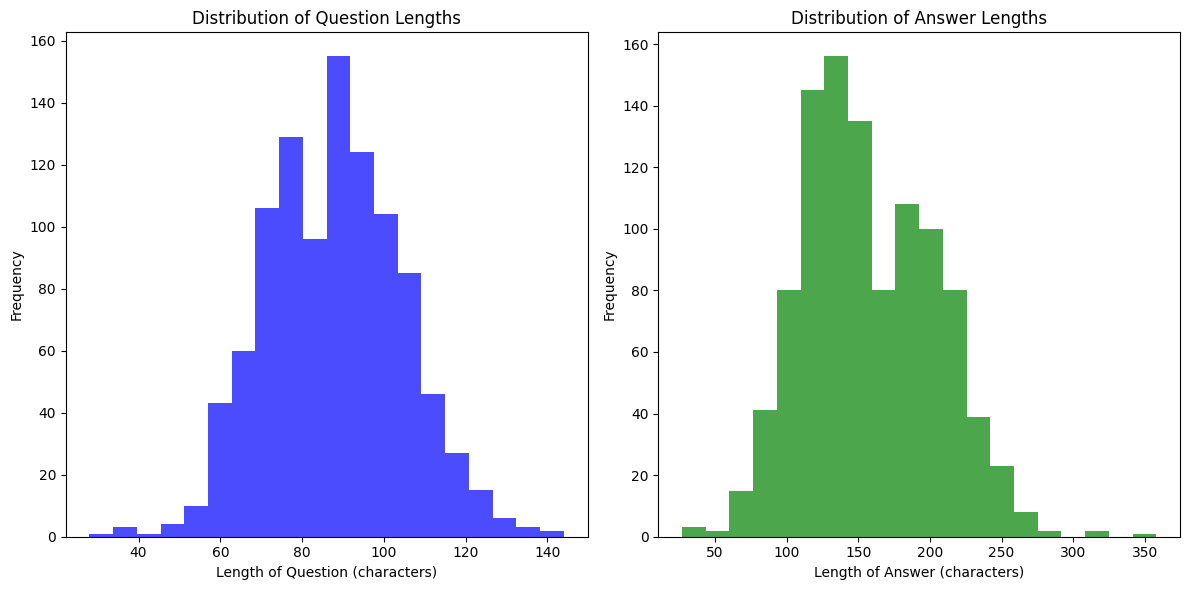

In [ ]:
# Calculate the length of each question and answer
question_lengths = Q_len_list
answer_lengths = A_len_list

# Plotting the distribution of question and answer lengths
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(question_lengths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Question Lengths')
plt.xlabel('Length of Question (characters)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(answer_lengths, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Length of Answer (characters)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()